In [24]:
%matplotlib inline

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, OneClassSVM

from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machines

**Support Vector Machines** (SVM) – the goal of this algorithm is to find the best separating hyperplane, that best separates the classes. SVM seeks to maximize the distance between the closest points (support vectors) of the different classes. A hyperplane in 2D space is a line that divides the data into different classes.

## Support Vector Classifier

In [27]:
iris_dataset = load_iris()

In [28]:
attributes, target = iris_dataset.data, iris_dataset.target

In [44]:
simple_svm = LinearSVC(loss = "hinge", max_iter = 10000)

In [45]:
simple_svm.fit(attributes, target)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', max_iter=10000)

In [46]:
# coefficients for each class. They show how strongly each characteristic affects the division.
simple_svm.coef_

array([[ 0.30941569,  0.42977525, -1.04546265, -0.61783526],
       [ 0.60997443, -1.6978468 ,  0.45768723, -1.62326122],
       [-1.11586633, -1.26839163,  1.70942697,  2.43543978]])

In [47]:
simple_svm.predict(attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
simple_svm.score(attributes, target)

0.94

In [49]:
# too simple model - with high regularization:
simple_svm2 = LinearSVC(C = 1e-5)

In [50]:
simple_svm2.fit(attributes, target)

LinearSVC(C=1e-05)

In [51]:
simple_svm2.coef_

array([[-0.00618904, -0.00165233, -0.00742259, -0.00280003],
       [-0.0048017 , -0.00319504, -0.00217717, -0.00075817],
       [-0.00380865, -0.00294015,  0.00018464,  0.00056783]])

In [52]:
simple_svm2.score(attributes, target)

0.3333333333333333

In [53]:
simple_svm2.predict(attributes)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
# medium regularization:
simple_svm3 = LinearSVC(C = 1e-3)

In [72]:
simple_svm3.fit(attributes, target)

LinearSVC(C=0.001)

In [73]:
simple_svm3.coef_

array([[ 0.01439041,  0.10003513, -0.18606446, -0.08267261],
       [-0.03772137, -0.07470285,  0.0391807 ,  0.00299681],
       [-0.07744742, -0.09388865,  0.11991673,  0.07658298]])

In [74]:
simple_svm3.predict(attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
simple_svm3.score(attributes, target)

0.6666666666666666

## Support Vector Regressor

**SVRegressor** works with continuous values. SVR searches for a hyperplane where as many data points as possible fall within the range *epsilon* (ε). These errors are within the tolerance and are considered correctly predicted. If any point is far outside this acceptable range epsilon, it is wrongly predicted. This points (support vector) must be taken into account when training the model. LinearSVR's loss function minimizes the distance between predicted and true values. \
SVR is useful when there is a lot of noisy data because it provides more flexibility by allowing for small errors and minimizing the impact of outliers.

## Problems with SVM's
- SVMs are slow for large sets (they compare each with each point to find the optimal dividing line). They have high complexity: between $O(m*n^2)$  and $O(m*n^3)$, where m is the number of features, n is the number of records. When there are many features, SVM must process a high-dimensional space.
- Another problem exists if the data has a non-linear relationship between the input characteristics and the target. Linear models such as linear regression or SVM with linear kernels cannot capture such dependence directly. **PolynomialFeatures** is a function for transforming the original features into polynomial combinations of a higher degree. This allows the algorithm to model non-linear relationships between the input features and the target without having to change the underlying algorithm. This allows linear models to approximate non-linear functions.

## Kernel tricks

### Polynomial kernel

In [76]:
poly_svm = LinearSVC(C=1e-3)

In [77]:
poly_attributes = PolynomialFeatures(degree=3).fit_transform(attributes)

In [78]:
poly_svm.fit(poly_attributes, target)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.001)

In [79]:
poly_svm.score(poly_attributes, target)

0.98

By complicating the data (features) I can use a simpler algorithm. This is Cover's theorem - if I represent the same data in a higher dimensional space, the algorithm I use may be simpler. But, the more dimensions there are, the slower the algorithm becomes!

In [80]:
poly_attributes.shape

(150, 35)

In [149]:
poly_svm.coef_

array([[ 0.00028263,  0.00101259,  0.00071025, -0.00029973, -0.00026695,
         0.00324567,  0.00254705, -0.00210402, -0.00147592,  0.00185488,
        -0.00072338, -0.00067621, -0.00243829, -0.00111167, -0.00044747,
         0.00796797,  0.00818288, -0.01330529, -0.00803999,  0.00672496,
        -0.00514127, -0.00372971, -0.01321067, -0.00582188, -0.00231359,
         0.00503724, -0.00163728, -0.00169667, -0.00602563, -0.00278641,
        -0.00112331, -0.00939004, -0.00374849, -0.00142895, -0.00053446],
       [ 0.0010512 ,  0.00543879,  0.00108785,  0.00900144,  0.00291564,
         0.01901879,  0.00355302,  0.03210434,  0.00918088, -0.00190131,
         0.01732793,  0.00605919,  0.02248584,  0.00400558, -0.00056964,
        -0.01241239, -0.02194945,  0.03966286,  0.00037508, -0.02109819,
         0.03734564,  0.01099363, -0.00382418, -0.02190164, -0.0184874 ,
        -0.01898956,  0.02855915,  0.01200338,  0.02540747,  0.00033786,
        -0.00487227, -0.05227001, -0.0371796 , -0.

Instead of directly transforming the data into a higher dimension, I can calculate the similarity (scalar product) between each pair of points in the original space, which is much easier and faster (eg If the scalar product is large and positive - the vectors are oriented in similar directions (if zero, they are perpendicular, and if negative, they are in opposite directions.) This is important for algorithms such as SVM that seek the optimal separating hyperplane between different classes.
**Kernels tricks** – the scalar product in the feature space is calculated using the kernel K(x,y) which is equivalent to the scalar product in the higher dimension: K(x,y) = ϕ(x)⋅ϕ(y). This allows the classification of non-linearly separable data without explicitly projecting the data into a higher dimension. Kernel function K(x,y) takes two points (vectors) and returns their "scalar product" in a higher dimension.

In [108]:
circle_attributes, circle_target = make_circles(noise=0.08, factor= 0.5, n_samples=200)

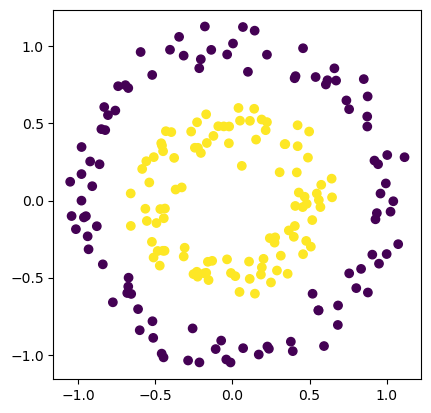

In [109]:
plt.scatter(circle_attributes[:,0], circle_attributes[:,1], c=circle_target)
plt.gca().set_aspect("equal")
plt.show()

How it works inside:

In [110]:
circle_svm = LinearSVC()

In [111]:
circle_svm.fit(circle_attributes, circle_target)

LinearSVC()

In [112]:
circle_svm.score(circle_attributes, circle_target)
# score = 0.52 -> predicts half the data

0.495

In [113]:
poly_circle_svm = LinearSVC()

In [114]:
poly_circle_attributes = PolynomialFeatures(degree=2).fit_transform(circle_attributes)

In [115]:
poly_circle_svm.fit(poly_circle_attributes, circle_target)

LinearSVC()

In [116]:
poly_circle_svm.score(poly_circle_attributes, circle_target)

1.0

In [117]:
poly_circle_attributes.shape

(200, 6)

Implement SVM with kernel function in real situation:

In [130]:
svm_circles_with_kernel = SVC(kernel = "poly", degree = 2)

In [131]:
svm_circles_with_kernel.fit(circle_attributes, circle_target)

SVC(degree=2, kernel='poly')

In [132]:
svm_circles_with_kernel.score(circle_attributes, circle_target)

1.0

In [152]:
# there is no coefficients !
svm_circles_with_kernel.coef_

AttributeError: coef_ is only available when using a linear kernel

### RBF kernel

RBF - Radial Basis Kernel (Gaussian -looks like a Gaussian distribution but 3D - convex, like a hat) makes a projection in infinite dimensional space. It calculates the distance between each pair of points and transforms it with an exponential function. Formula: $exp(−γ ||x−y||^2)$, where gamma (γ) controls the width of the Gaussian function; ||x−y|| is the Euclidean distance between the points x and y. RBF has only one basic gamma parameter that controls the range of the function. The RBF exponential function can be represented as a polynomial of infinite degree, with a Taylor series (a polynomial with infinitely many terms). The RBF kernel can be thought of as a polynomial, of infinite degree - it makes a projection in an infinite-dimensional space. \
A large γ leads to a more precise bound but risk of overfitting. \
A small γ leads to a smoother boundary, but risks of too simple model..

In [145]:
svm_circles_with_rbf = SVC(kernel = "rbf", gamma = 0.1)

In [146]:
svm_circles_with_rbf.fit(circle_attributes, circle_target)

SVC(gamma=0.1)

In [147]:
svm_circles_with_rbf.score(circle_attributes, circle_target)

0.835

In [151]:
# there is no coefficients !
svm_circles_with_rbf.coef_

AttributeError: coef_ is only available when using a linear kernel

## K-Nearest Neighbors

KNN is a simple and intuitive algorithm that learns all points (instance space learning). A KNN classifies or predicts a value by looking at the nearest "neighbors" of a point in space. The idea is that points that are close to each other usually belong to the same class or have similar values. Basic steps of KNN:
- Saves all training data;
- Calculates distances – when it needs to classify or predict a new point, KNN calculates the distance between the new point and all points in the training set. The most commonly used is the Euclidean distance, which measures the "straight line" between two points;
- Selects K number of nearest neighbors after the distances to all points have been calculated (K is a parameter that must be chosen beforehand). 
  
In classification, the algorithm counts how many of the nearest neighbors belong to each class. The most numerous class (majority vote) is chosen for the new point. \
In regression, the algorithm calculates the average of the neighbors and uses this for prediction.
KNN is used for data mining. Also very useful for filling in missing data (data interpolation), based on other data.

In [163]:
knn = KNeighborsClassifier(n_neighbors=5)

In [164]:
knn.fit(circle_attributes[:-50], circle_target[:-50])

KNeighborsClassifier()

In [165]:
knn.score(circle_attributes[:-50], circle_target[:-50])

1.0

In [166]:
knn2 = KNeighborsClassifier(n_neighbors=30)

In [167]:
knn2.fit(circle_attributes[:-50], circle_target[:-50])

KNeighborsClassifier(n_neighbors=30)

In [168]:
knn2.score(circle_attributes[:-50], circle_target[:-50])

0.8866666666666667

## Demo:

In [169]:
pulsar = pd.read_csv("data/pulsar_stars.csv")

In [172]:
# numbers are a measure of how bright something is;
pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [174]:
# all features are obtained by feature engineering:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [181]:
pulsar.target_class.value_counts(normalize = True) * 100

target_class
0    90.842552
1     9.157448
Name: proportion, dtype: float64

In [189]:
pulsar_attrs_train, pulsar_attrs_test, pulsar_target_train, pulsar_target_test = train_test_split(
    pulsar.drop(columns = "target_class"),
    pulsar.target_class,
    test_size = 0.25,
    stratify = pulsar.target_class
)

In [192]:
svm_pulsars = LinearSVC()

In [193]:
svm_pulsars.fit(pulsar_attrs_train, pulsar_target_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [194]:
svm_pulsars.score(pulsar_attrs_train, pulsar_target_train)

0.9758623258586009

In [196]:
svm_pulsars.score(pulsar_attrs_test, pulsar_target_test)

0.9736312849162011

In [197]:
svm_pulsars.coef_

array([[-7.62030532e-04, -9.64668480e-03,  1.21635514e+00,
        -9.40600431e-02, -6.28939129e-03,  6.09683276e-03,
        -1.16513121e-01,  1.75394570e-03]])

Third feature ("Excess kurtosis of the integrated profile") with coeff = 1.21635514e+00 has the most importance.

## Anomaly detection

In [217]:
anomaly_detector = OneClassSVM(nu=0.3)

In [218]:
anomaly_detector.fit(pulsar_attrs_train)

OneClassSVM(nu=0.3)

In [219]:
predict_detector = anomaly_detector.predict(pulsar_attrs_train)

In [220]:
pd.DataFrame(predict_detector).value_counts()

 1    9396
-1    4027
Name: count, dtype: int64